## Introduction:
In this project, the objective is to analyze and predict customer churn for a telecommunications company. Customer churn refers to the phenomenon where subscribers discontinue their services, and understanding the factors influencing this behavior is crucial for business sustainability. By leveraging data on customers' network usage and whether they churned or not, we aim to build a predictive model that can identify potential churners.



## objective  :

the obective of this project is to help a telecommunications company to understand why they lose subscribers and how to reduce the rate of churn.I'm given a data containing customers' network usage and a column that tells whether they churn(unsubscribe) or not. build a model to predict whether a customer will churn or not

## data dictionary
1- State: the US state in which the customer resides, indicated by a two-letter abbreviation

2- Account Length: the number of days that this account has been active

3- Area Code: the three-digit area code of the corresponding customer’s phone number

4- Phone: the remaining seven-digit phone number

5- Int’l Plan: whether the customer has an international calling plan: yes/no

6- VMail Plan: whether the customer has a voice mail feature: yes/no

7- VMail Message: presumably the average number of voice mail messages per month

8- Day Mins: the total number of calling minutes used during the day

9- Day Calls: the total number of calls placed during the day

10- Day Charge: the billed cost of daytime calls

11- Eve Mins: the total number of calling minutes used during the evening

12- Eve Calls: the total number of calls placed during the evening

13- Eve Charge: the billed cost of evening time calls

14- Night Mins: the total number of calling minutes used during the night

15- Night Calls: the total number of calls placed during the night

16- Night Charge: the billed cost of nighttime calls

17- Intl Mins: the total number of international minutes

18- Intl Calls: the total number of international calls

19- Intl Charge: the billed cost for international calls

20- CustServ Calls: the number of calls placed to Customer Service

21- Churn?: whether the customer left the service: true/false

## Approach and Methodology Overview:
- understanding the problem
- undertanding the data
- exploring the data
- preparing the data
- modeling the data
- eveluating the model
- communicating your results
- deploying the model

## **Data Exploration**

In [948]:
import pandas as pd

In [949]:
Churn_Train = 'C:/Users/SAMSUNG/Documents/Churn_Train.csv'

In [950]:
Churn_Train_df = pd.read_csv(Churn_Train)

In [951]:
Churn_Train_df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [952]:
df = pd.DataFrame(Churn_Train_df)

In [953]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
3,HI,NaN,area_code_408,no,yes,30.0,110.3,71.0,18.75,182.4,108.0,15.50,183.8,88,8.27,11.0,8.0,2.97,2.0,no
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes


In [954]:
df.shape

(3333, 20)

In [955]:
df.to_csv('Churn_Train.csv')

In [956]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 2832 non-null   float64
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3133 non-null   float64
 6   total_day_minutes              3133 non-null   float64
 7   total_day_calls                3133 non-null   float64
 8   total_day_charge               3133 non-null   float64
 9   total_eve_minutes              3032 non-null   float64
 10  total_eve_calls                3133 non-null   float64
 11  total_eve_charge               3133 non-null   float64
 12  total_night_minutes            3133 non-null   f

In [957]:
# Convert dtype of categorical columns
cat_cols = ['state','area_code','international_plan','voice_mail_plan','churn']

df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   state                          3333 non-null   category
 1   account_length                 2832 non-null   float64 
 2   area_code                      3333 non-null   category
 3   international_plan             3333 non-null   category
 4   voice_mail_plan                3333 non-null   category
 5   number_vmail_messages          3133 non-null   float64 
 6   total_day_minutes              3133 non-null   float64 
 7   total_day_calls                3133 non-null   float64 
 8   total_day_charge               3133 non-null   float64 
 9   total_eve_minutes              3032 non-null   float64 
 10  total_eve_calls                3133 non-null   float64 
 11  total_eve_charge               3133 non-null   float64 
 12  total_night_minutes            313

## indentifying of missing values and data cleaning¶

In [958]:
# check for misng values
df.isnull().sum()

state                              0
account_length                   501
area_code                          0
international_plan                 0
voice_mail_plan                    0
number_vmail_messages            200
total_day_minutes                200
total_day_calls                  200
total_day_charge                 200
total_eve_minutes                301
total_eve_calls                  200
total_eve_charge                 200
total_night_minutes              200
total_night_calls                  0
total_night_charge               200
total_intl_minutes               200
total_intl_calls                 301
total_intl_charge                200
number_customer_service_calls    200
churn                              0
dtype: int64

Descriptive Statistics  for column lenght

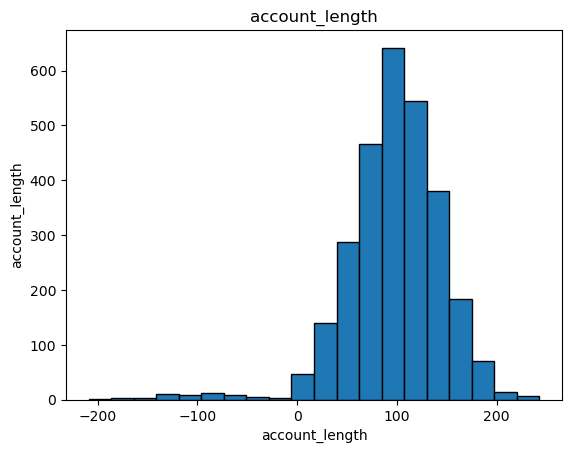

In [959]:
import matplotlib.pyplot as plt

df['account_length'].plot(kind='hist', bins=20, edgecolor='black')

plt.title('account_length')
plt.xlabel('account_length')
plt.ylabel('account_length')

plt.show()

#Task: filter the dataset for account lengths less than or equal to zero. call them inactive account, to
find out if inactivity has a relationship with churn.

In [960]:
inactive_accounts = df[df['account_length'] <= 0]

In [961]:
inactive_accounts.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
163,NM,-80.0,area_code_510,no,no,0.0,206.3,97.0,35.07,154.9,98.0,13.17,263.6,82,11.86,12.4,12.0,3.35,0.0,no
182,WI,-72.0,area_code_408,no,no,0.0,179.9,113.0,30.58,149.8,112.0,12.73,168.2,79,7.57,9.8,7.0,2.65,2.0,no
303,ND,-12.0,area_code_510,yes,no,0.0,216.7,117.0,36.84,116.5,126.0,9.90,220.0,110,9.90,9.8,4.0,2.65,2.0,no
581,NV,-53.0,area_code_415,no,no,0.0,168.8,97.0,28.70,220.3,87.0,18.73,154.3,113,6.94,10.9,2.0,2.94,0.0,no
665,MN,-59.0,area_code_408,no,yes,32.0,211.9,120.0,36.02,202.9,136.0,17.25,213.5,95,9.61,8.8,5.0,2.38,1.0,no


In [962]:
inactive_accounts.shape

(51, 20)

In [963]:
# checking the relationship and inpact of inactive active account
inactive_churn = inactive_accounts[inactive_accounts['churn'] == 'yes']

In [964]:
inactive_churn

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1335,WA,-45.0,area_code_510,no,no,0.0,78.6,106.0,13.36,187.3,110.0,15.92,184.2,111,8.29,7.4,5.0,2.00,1.0,yes
2083,OH,-68.0,area_code_415,yes,yes,24.0,125.7,92.0,21.37,275.9,98.0,23.45,214.5,108,9.65,14.2,6.0,3.83,3.0,yes
2353,MI,-148.0,area_code_415,yes,no,0.0,233.5,81.0,39.70,187.7,71.0,15.95,122.3,97,5.50,9.6,2.0,2.59,0.0,yes
3025,FL,-127.0,area_code_415,no,no,0.0,266.6,106.0,45.32,264.8,168.0,22.51,207.2,119,9.32,5.9,2.0,1.59,1.0,yes
3072,IL,-137.0,area_code_408,yes,no,0.0,237.3,103.0,40.34,176.7,84.0,15.02,263.4,81,11.85,14.2,4.0,3.83,0.0,yes


In [965]:
# data cleaning
import pandas as pd
df = df.dropna()

In [966]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes
6,NC,135.0,area_code_415,no,no,0.0,201.8,81.0,34.31,225.0,114.0,19.13,204.4,82,9.20,10.3,6.0,2.78,1.0,no


In [967]:
# chech for misng values
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [968]:
df.shape

(2630, 20)

## Outlier Check

In [969]:

num_cols = df.select_dtypes(include=['int','float']).columns
i = ['tr'+str(n) for n in range(1,16)]

fig = make_subplots(rows=5, cols=3, 
                    subplot_titles=[f'{col} Box Plot' for col in num_cols],
                   vertical_spacing=0.03)

for index,(col,trace) in enumerate(zip(num_cols, i)):
    trace = go.Box(y=df[col], boxmean=True, name=col)
    fig.add_trace(trace, row=(index//3)+1, col=(index%3)+1)

fig.update_layout(height=2000, width=1000, 
                  title_text='Outlier Check in Numerical Columns', 
                  showlegend=False)
fig.show()

In [970]:
# handling outliers by fliiung the outliers with the mean of the df
df.fillna(df.mean(numeric_only=True), inplace=True)

In [971]:
df

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,NV,125.0,area_code_510,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no
1,HI,108.0,area_code_415,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes
2,DC,82.0,area_code_415,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes
4,OH,83.0,area_code_415,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes
6,NC,135.0,area_code_415,no,no,0.0,201.8,81.0,34.31,225.0,114.0,19.13,204.4,82,9.20,10.3,6.0,2.78,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,IL,148.0,area_code_408,no,yes,25.0,1998.2,102.0,39.22,1165.8,109.0,19.87,215.8,90,9.71,13.5,2.0,3.65,3.0,no
3326,KY,151.0,area_code_408,no,yes,17.0,214.7,97.0,36.50,138.5,90.0,11.77,169.1,44,7.61,8.6,4.0,2.32,1.0,no
3328,OH,144.0,area_code_415,no,yes,18.0,106.4,109.0,18.09,108.1,113.0,9.19,208.4,111,9.38,10.1,5.0,2.73,1.0,no
3331,NY,39.0,area_code_408,no,no,0.0,2039.6,68.0,27.27,1034.6,103.0,8.72,235.3,106,10.59,9.1,5.0,2.46,2.0,no


# data processing and handling category variables

In [972]:
#creating a new column note that we used the dropna and sebset to drop row which has nan as value in area code dataset
pd.options.mode.chained_assignment = None  # default='warn'
df['area'] = df.area_code.str.split('_', expand=True)[2]

In [973]:
# Convert it to an int
df['area'].astype(int)

0       510
1       415
2       415
4       415
6       415
       ... 
3324    408
3326    408
3328    415
3331    408
3332    408
Name: area, Length: 2630, dtype: int32

In [974]:
# drop area code column to remove the column area_code
df.drop('area_code', axis=1, inplace=True)

In [975]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area
0,NV,125.0,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no,510
1,HI,108.0,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes,415
2,DC,82.0,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes,415
4,OH,83.0,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes,415
6,NC,135.0,no,no,0.0,201.8,81.0,34.31,225.0,114.0,19.13,204.4,82,9.20,10.3,6.0,2.78,1.0,no,415


In [976]:
# checking the uniquness of the of column name area
df.area.nunique()

3

In [977]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area
0,NV,125.0,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no,510
1,HI,108.0,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes,415
2,DC,82.0,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes,415
4,OH,83.0,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes,415
6,NC,135.0,no,no,0.0,201.8,81.0,34.31,225.0,114.0,19.13,204.4,82,9.20,10.3,6.0,2.78,1.0,no,415


In [978]:
# transform state

In [979]:
#  'state' i'm coverting it to int 
state_mapping = {state: index for index, state in enumerate(df['state'].unique())}

In [980]:
# Map the values in the 'state' column to integers
df['state'] = df['state'].map(state_mapping)


In [981]:
df['state'].astype(int)

0        0
1        1
2        2
4        3
6        4
        ..
3324    48
3326     8
3328     3
3331    10
3332    35
Name: state, Length: 2630, dtype: int32

In [982]:
df

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area
0,0,125.0,no,no,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,no,510
1,1,108.0,no,no,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,yes,415
2,2,82.0,no,no,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,yes,415
4,3,83.0,no,no,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,yes,415
6,4,135.0,no,no,0.0,201.8,81.0,34.31,225.0,114.0,19.13,204.4,82,9.20,10.3,6.0,2.78,1.0,no,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3324,48,148.0,no,yes,25.0,1998.2,102.0,39.22,1165.8,109.0,19.87,215.8,90,9.71,13.5,2.0,3.65,3.0,no,408
3326,8,151.0,no,yes,17.0,214.7,97.0,36.50,138.5,90.0,11.77,169.1,44,7.61,8.6,4.0,2.32,1.0,no,408
3328,3,144.0,no,yes,18.0,106.4,109.0,18.09,108.1,113.0,9.19,208.4,111,9.38,10.1,5.0,2.73,1.0,no,415
3331,10,39.0,no,no,0.0,2039.6,68.0,27.27,1034.6,103.0,8.72,235.3,106,10.59,9.1,5.0,2.46,2.0,no,408


In [983]:
# checking the uniquness of the of column name state
df.state.nunique()

51

In [984]:
# transform colums with non-numeric value to numeric
df.international_plan = df.international_plan.replace('yes',  1).replace('no', 0)

df.voice_mail_plan = df.voice_mail_plan.replace('yes',  1).replace('no', 0)

df.churn = df.churn.replace('yes',  1).replace('no', 0)

In [985]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area
0,0,125.0,0,0,0.0,2013.4,99.0,28.66,1107.6,107.0,14.93,243.3,92,10.95,10.9,7.0,2.94,0.0,0,510
1,1,108.0,0,0,0.0,291.6,99.0,49.57,221.1,93.0,18.79,229.2,110,10.31,14.0,9.0,3.78,2.0,1,415
2,2,82.0,0,0,0.0,300.3,109.0,51.05,181.0,100.0,15.39,270.1,73,12.15,11.7,4.0,3.16,0.0,1,415
4,3,83.0,0,0,0.0,337.4,120.0,57.36,227.4,116.0,19.33,153.9,114,6.93,15.8,7.0,4.27,0.0,1,415
6,4,135.0,0,0,0.0,201.8,81.0,34.31,225.0,114.0,19.13,204.4,82,9.20,10.3,6.0,2.78,1.0,0,415


#task: sum the total minutes for day evening and night   

In [986]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes']

In [987]:
df.drop(['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'], 
        axis='columns', inplace=True)

In [989]:
# task sum up the charge and call for day evening and night

In [990]:
print(df.columns)

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_calls', 'total_day_charge',
       'total_eve_calls', 'total_eve_charge', 'total_night_calls',
       'total_night_charge', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'area', 'total_minutes'],
      dtype='object')


In [991]:
## Create a new column for total call and add up the calls for day, evening, and night
df['total_call'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls']

# Drop the columns 'total_day_calls', 'total_eve_calls', 'total_night_calls'
df.drop(['total_day_calls', 'total_eve_calls', 'total_night_calls' , 'total_intl_calls'], axis='columns', inplace=True)

# Create a new column for total charges and add up the charges for day, evening, and night
df['total_charges'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] +df['total_intl_charge']

# Drop the columns 'total_day_charge', 'total_eve_charge', 'total_night_charge'
df.drop(['total_day_charge', 'total_eve_charge', 'total_night_charge' , 'total_intl_charge'], axis='columns', inplace=True)


In [992]:
df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,area,total_minutes,total_call,total_charges
0,0,125.0,0,0,0.0,0.0,0,510,3375.2,305.0,57.48
1,1,108.0,0,0,0.0,2.0,1,415,755.9,311.0,82.45
2,2,82.0,0,0,0.0,0.0,1,415,763.1,286.0,81.75
4,3,83.0,0,0,0.0,0.0,1,415,734.5,357.0,87.89
6,4,135.0,0,0,0.0,1.0,0,415,641.5,283.0,65.42


In [993]:
len(df.columns)

11

In [994]:
df

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,area,total_minutes,total_call,total_charges
0,0,125.0,0,0,0.0,0.0,0,510,3375.2,305.0,57.48
1,1,108.0,0,0,0.0,2.0,1,415,755.9,311.0,82.45
2,2,82.0,0,0,0.0,0.0,1,415,763.1,286.0,81.75
4,3,83.0,0,0,0.0,0.0,1,415,734.5,357.0,87.89
6,4,135.0,0,0,0.0,1.0,0,415,641.5,283.0,65.42
...,...,...,...,...,...,...,...,...,...,...,...
3324,48,148.0,0,1,25.0,3.0,0,408,3393.3,303.0,72.45
3326,8,151.0,0,1,17.0,1.0,0,408,530.9,235.0,58.20
3328,3,144.0,0,1,18.0,1.0,0,415,433.0,338.0,39.39
3331,10,39.0,0,0,0.0,2.0,0,408,3318.6,282.0,49.04


## **Descriptive Statistics**

In [995]:
# Display summary statistics
df.describe().head()

,account_length,number_vmail_messages,number_customer_service_calls,total_minutes,total_call,total_charges
count,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000,2630.000000
mean,96.655894,7.101141,1.550570,1019.954677,304.663118,59.690217
std,48.165153,13.682081,1.293218,1009.829468,34.493397,10.395375
min,-209.000000,-10.000000,0.000000,284.300000,191.000000,22.930000
25%,71.000000,0.000000,1.000000,545.600000,282.000000,52.560000


In [996]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,2630.0,96.655894,48.165153,-209.00,71.00,100.000,126.75,243.00
number_vmail_messages,2630.0,7.101141,13.682081,-10.00,0.00,0.000,15.00,51.00
number_customer_service_calls,2630.0,1.550570,1.293218,0.00,1.00,1.000,2.00,8.00
total_minutes,2630.0,1019.954677,1009.829468,284.30,545.60,614.200,700.15,3596.20
total_call,2630.0,304.663118,34.493397,191.00,282.00,305.000,328.00,416.00
total_charges,2630.0,59.690217,10.395375,22.93,52.56,59.635,66.59,96.15


In [997]:
df.describe(include='all')

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,area,total_minutes,total_call,total_charges
count,2630.0,2630.000000,2630.0,2630.0,2630.000000,2630.000000,2630.0,2630,2630.000000,2630.000000,2630.000000
unique,51.0,NaN,2.0,2.0,NaN,NaN,2.0,3,NaN,NaN,NaN
top,23.0,NaN,0.0,0.0,NaN,NaN,0.0,415,NaN,NaN,NaN
freq,90.0,NaN,2380.0,1899.0,NaN,NaN,2250.0,1320,NaN,NaN,NaN
mean,NaN,96.655894,NaN,NaN,7.101141,1.550570,NaN,NaN,1019.954677,304.663118,59.690217
std,NaN,48.165153,NaN,NaN,13.682081,1.293218,NaN,NaN,1009.829468,34.493397,10.395375
min,NaN,-209.000000,NaN,NaN,-10.000000,0.000000,NaN,NaN,284.300000,191.000000,22.930000
25%,NaN,71.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,545.600000,282.000000,52.560000
50%,NaN,100.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,614.200000,305.000000,59.635000
75%,NaN,126.750000,NaN,NaN,15.000000,2.000000,NaN,NaN,700.150000,328.000000,66.590000


In [998]:
df.shape

(2630, 11)

<Axes: >

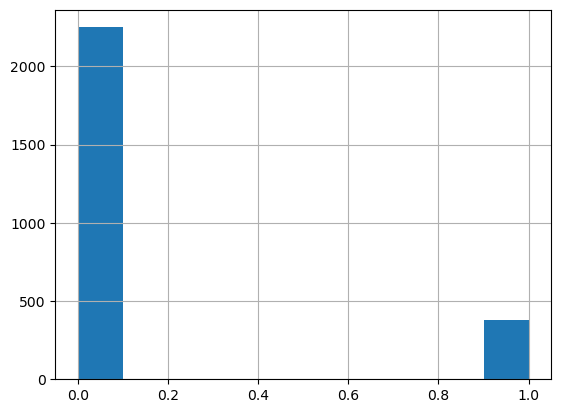

In [1000]:
# use histogram to check the nature of strucure fo churn
df.churn.hist()

In [1001]:
# split dataset to train and test csv to prepare our data for modeling

In [1002]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the split DataFrames to separate CSV files
train_df.to_csv('churn_train.csv', index=False)
test_df.to_csv('churn_test.csv', index=False)

In [1003]:
# Print the column names in train_df
print(train_df.columns)

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'number_customer_service_calls', 'churn',
       'area', 'total_minutes', 'total_call', 'total_charges'],
      dtype='object')


In [1004]:
train_df

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,area,total_minutes,total_call,total_charges
1536,18,108.0,1,1,42.0,3.0,1,415,555.4,303.0,51.00
2981,43,158.0,0,0,0.0,0.0,0,510,702.8,317.0,70.37
600,41,82.0,0,1,34.0,3.0,0,510,677.2,316.0,66.73
1525,34,155.0,0,0,-6.0,0.0,1,415,599.2,327.0,62.03
543,43,70.0,0,0,0.0,3.0,0,415,3470.4,305.0,56.71
...,...,...,...,...,...,...,...,...,...,...,...
2080,29,-50.0,0,1,31.0,3.0,0,408,750.7,329.0,84.30
1389,26,131.0,0,1,36.0,3.0,0,408,650.1,338.0,64.63
1437,45,113.0,0,0,0.0,2.0,0,415,563.4,322.0,59.09
1641,48,-44.0,0,1,34.0,0.0,0,415,625.2,259.0,65.48


## Exploratory Data Analysis

In [1005]:
# checking for missing values in our train dataset
train_df.isnull().sum()

state                            0
account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
number_customer_service_calls    0
churn                            0
area                             0
total_minutes                    0
total_call                       0
total_charges                    0
dtype: int64

In [1006]:
train_df.describe(include='all')

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,area,total_minutes,total_call,total_charges
count,2104.0,2104.000000,2104.0,2104.0,2104.000000,2104.000000,2104.0,2104,2104.000000,2104.000000,2104.000000
unique,51.0,NaN,2.0,2.0,NaN,NaN,2.0,3,NaN,NaN,NaN
top,23.0,NaN,0.0,0.0,NaN,NaN,0.0,415,NaN,NaN,NaN
freq,66.0,NaN,1900.0,1527.0,NaN,NaN,1795.0,1066,NaN,NaN,NaN
mean,NaN,95.555133,NaN,NaN,7.009981,1.564639,NaN,NaN,1026.093203,303.379753,59.811416
std,NaN,49.758263,NaN,NaN,13.686261,1.306047,NaN,NaN,1015.512133,34.650223,10.406059
min,NaN,-209.000000,NaN,NaN,-10.000000,0.000000,NaN,NaN,322.900000,191.000000,22.930000
25%,NaN,70.750000,NaN,NaN,0.000000,1.000000,NaN,NaN,546.175000,280.000000,52.570000
50%,NaN,99.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,614.950000,304.000000,60.075000
75%,NaN,126.000000,NaN,NaN,13.000000,2.000000,NaN,NaN,701.900000,326.000000,66.815000


In [1007]:
train_df.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,churn,area,total_minutes,total_call,total_charges
1536,18,108.0,1,1,42.0,3.0,1,415,555.4,303.0,51.00
2981,43,158.0,0,0,0.0,0.0,0,510,702.8,317.0,70.37
600,41,82.0,0,1,34.0,3.0,0,510,677.2,316.0,66.73
1525,34,155.0,0,0,-6.0,0.0,1,415,599.2,327.0,62.03
543,43,70.0,0,0,0.0,3.0,0,415,3470.4,305.0,56.71


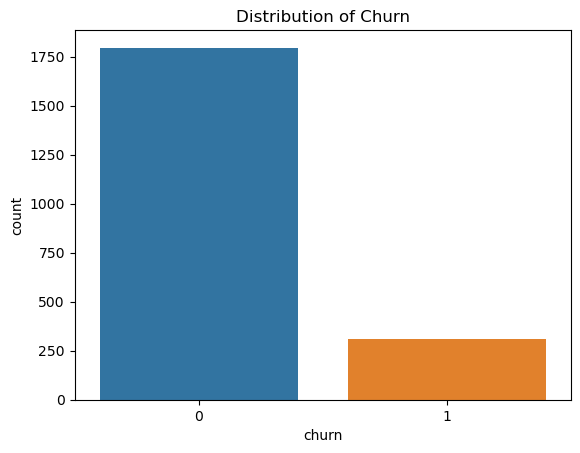

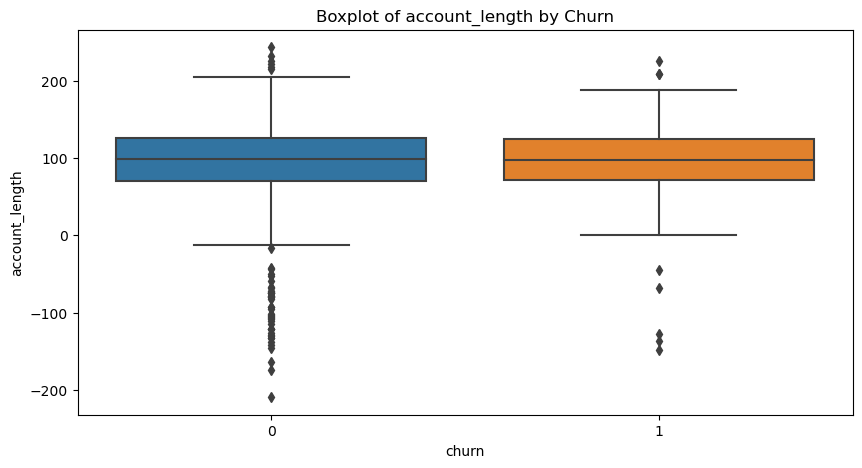

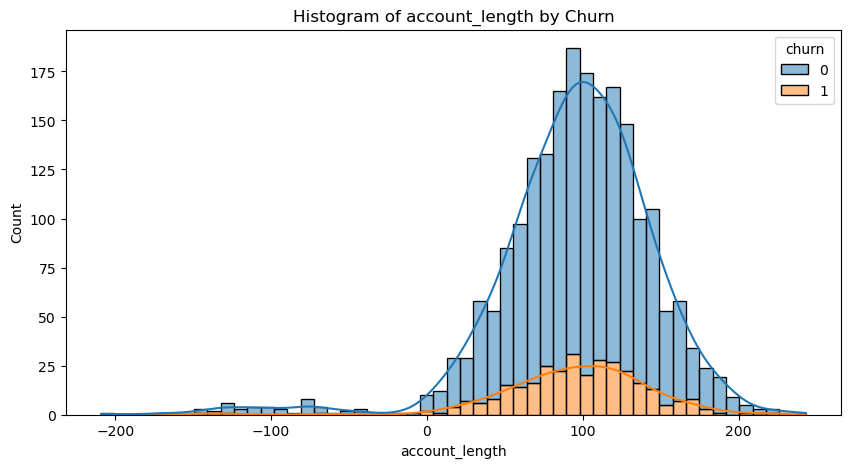

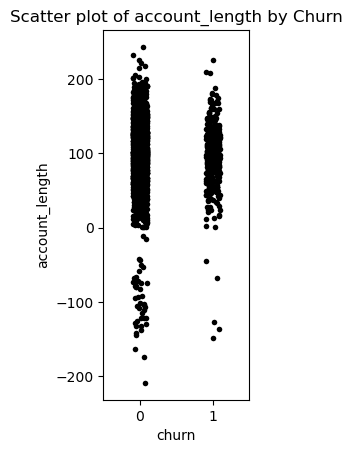

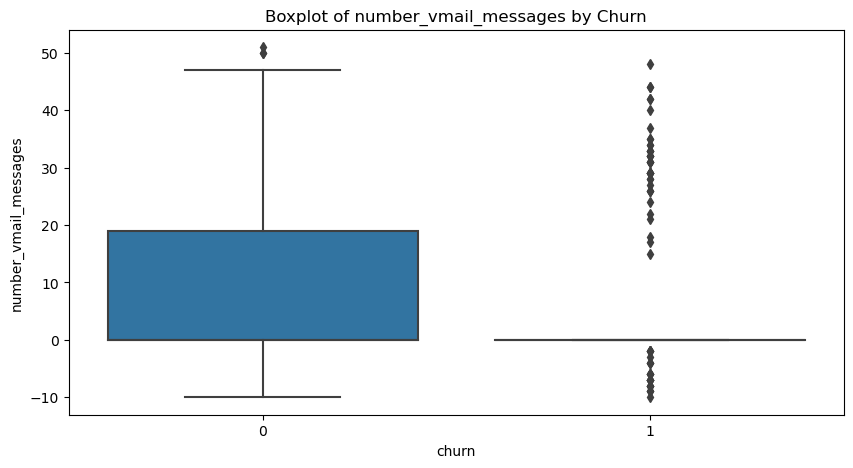

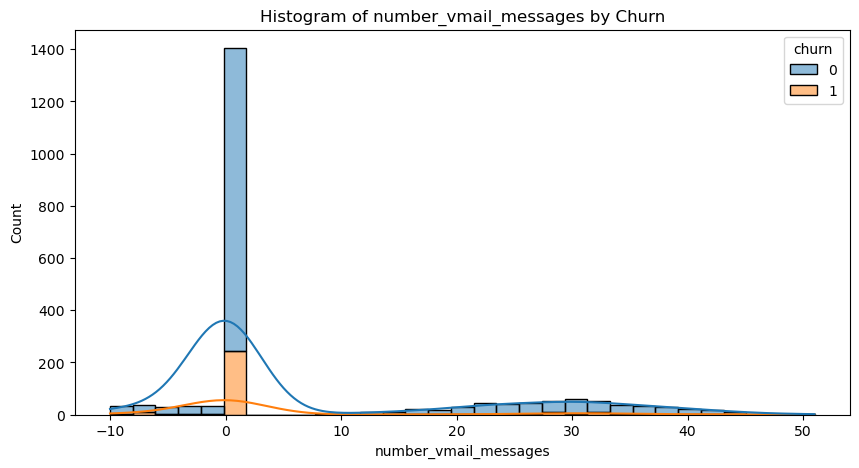

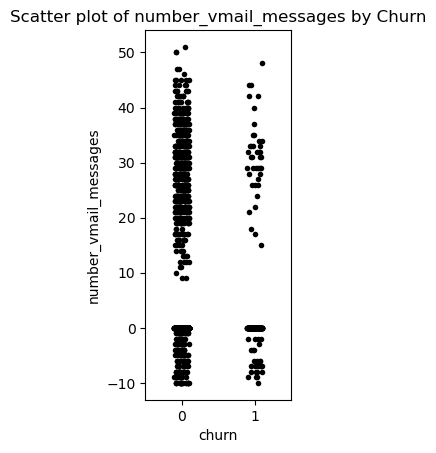

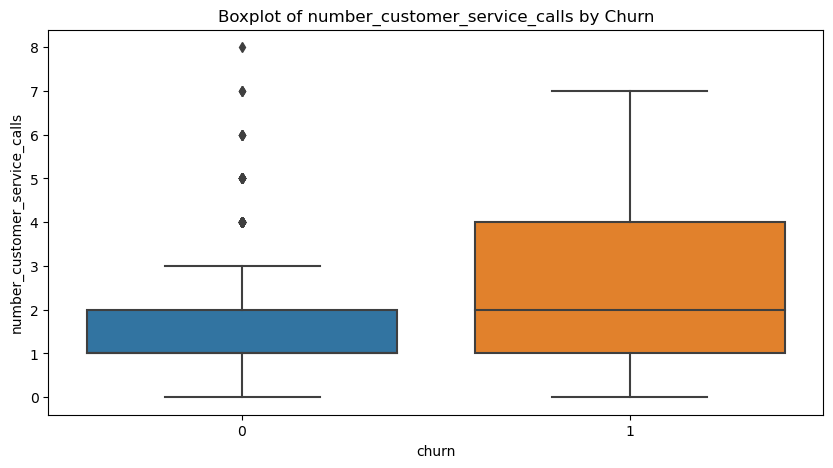

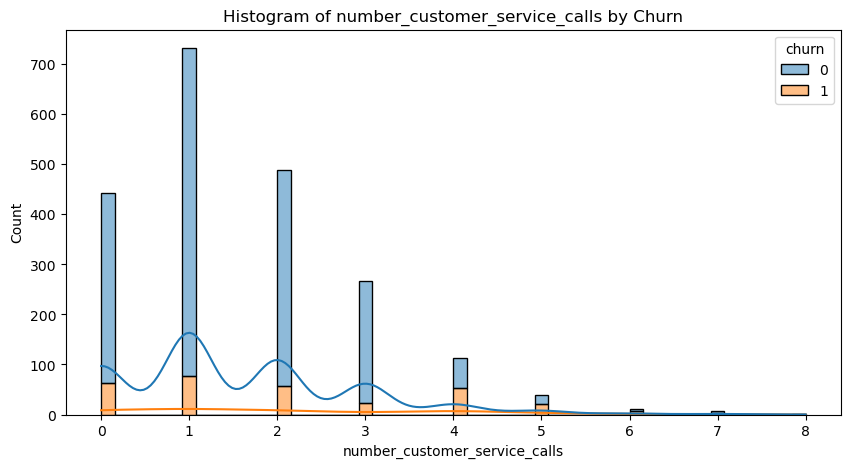

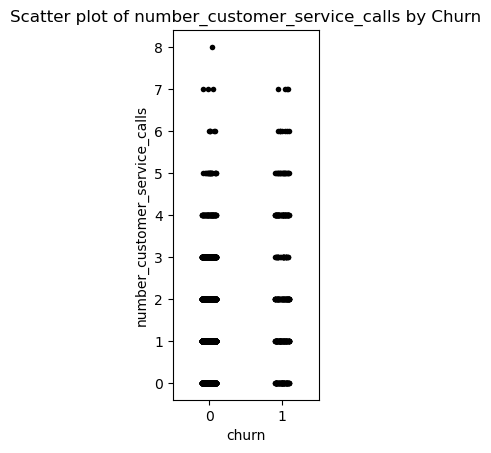

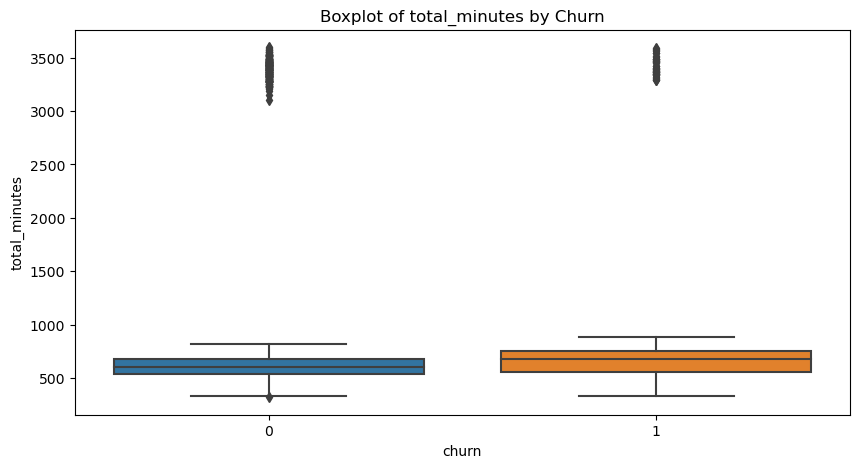

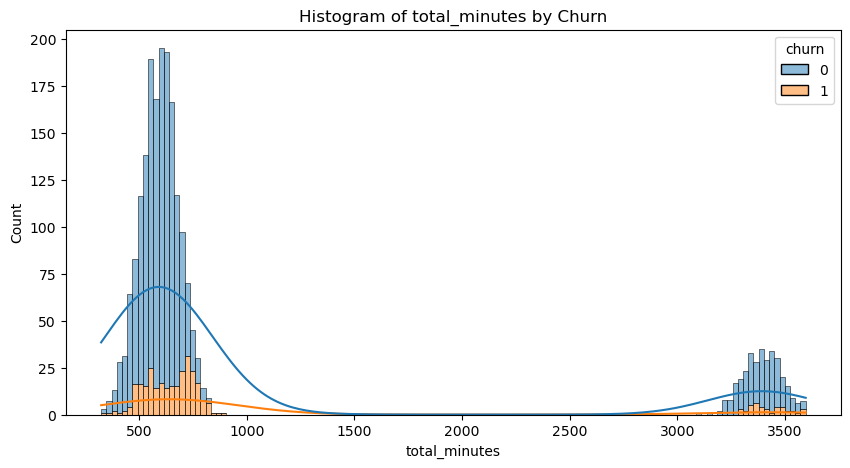

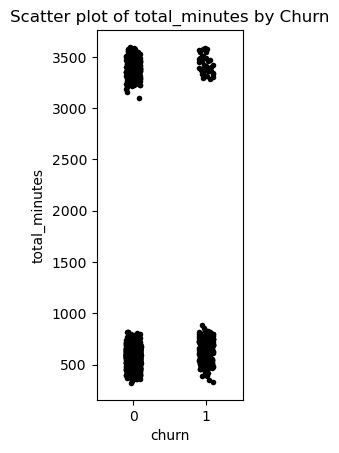

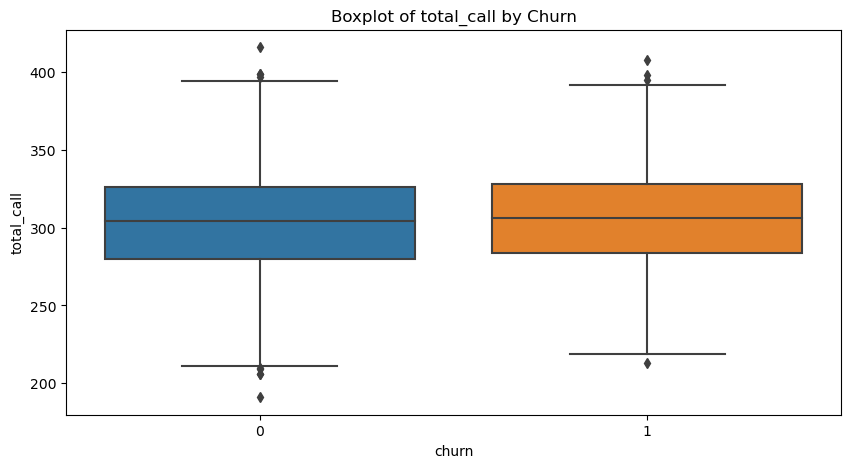

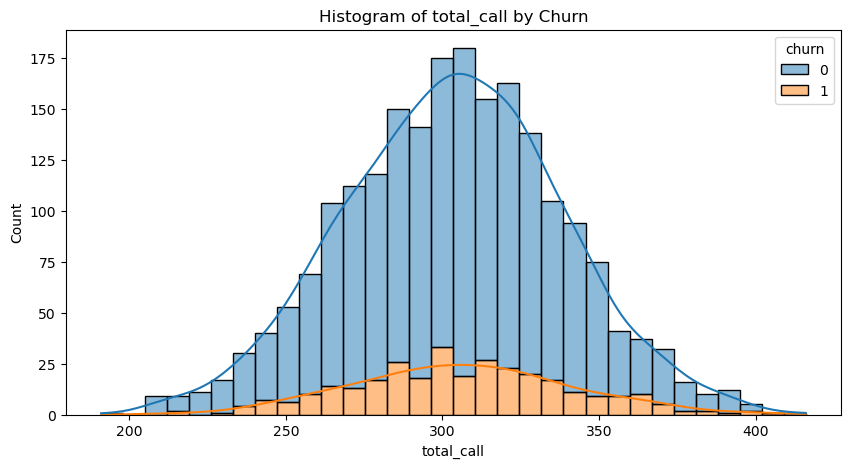

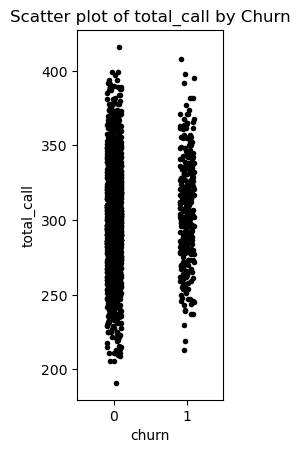

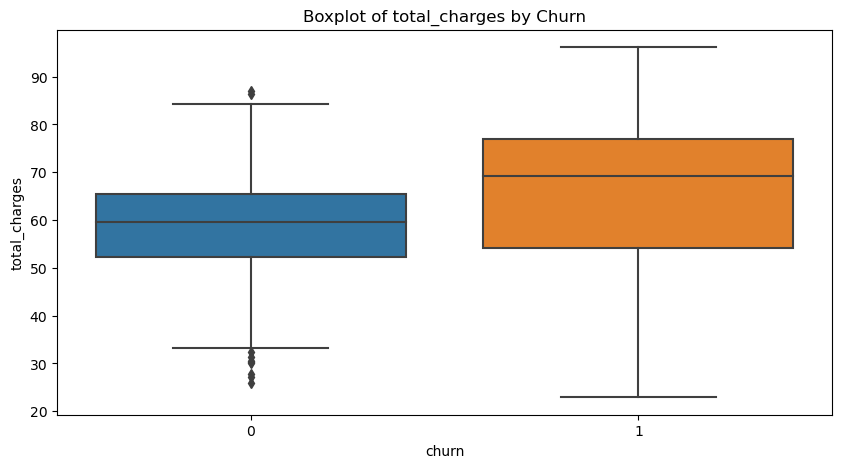

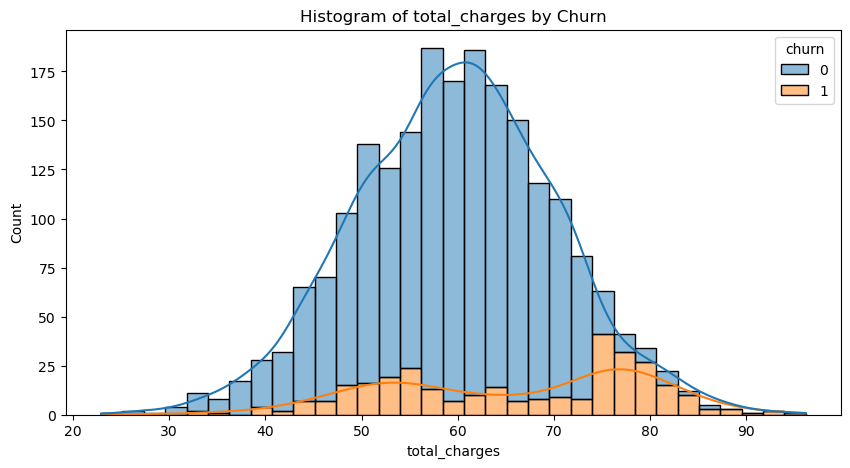

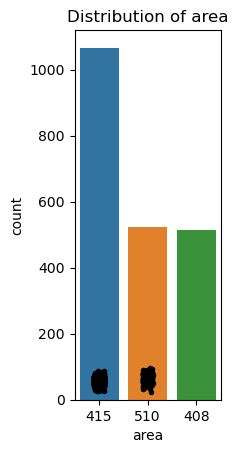

In [1008]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Distribution of the target variable
sns.countplot(x='churn', data=train_df)
plt.title('Distribution of Churn')
plt.show()

# Boxplot for numerical variables
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='churn', y=col, data=train_df)
    plt.title(f'Boxplot of {col} by Churn')
    plt.show()

    # Histogram
    plt.figure(figsize=(10, 5))
    sns.histplot(data=train_df, x=col, hue='churn', multiple='stack', kde=True)
    plt.title(f'Histogram of {col} by Churn')
    plt.show()
    
    # scatter
    plt.subplot(1, 3, 2)
    sns.stripplot(x='churn', y=col, data=train_df, color='black', size=4, jitter=True)
    plt.title(f'Scatter plot of {col} by Churn')

# Distribution of categorical variables
cat_cols = train_df.select_dtypes(include='object').columns
for col in cat_cols:
    sns.countplot(x=col, data=train_df)
    plt.title(f'Distribution of {col}')
    plt.show()

## Correlation Analysis 

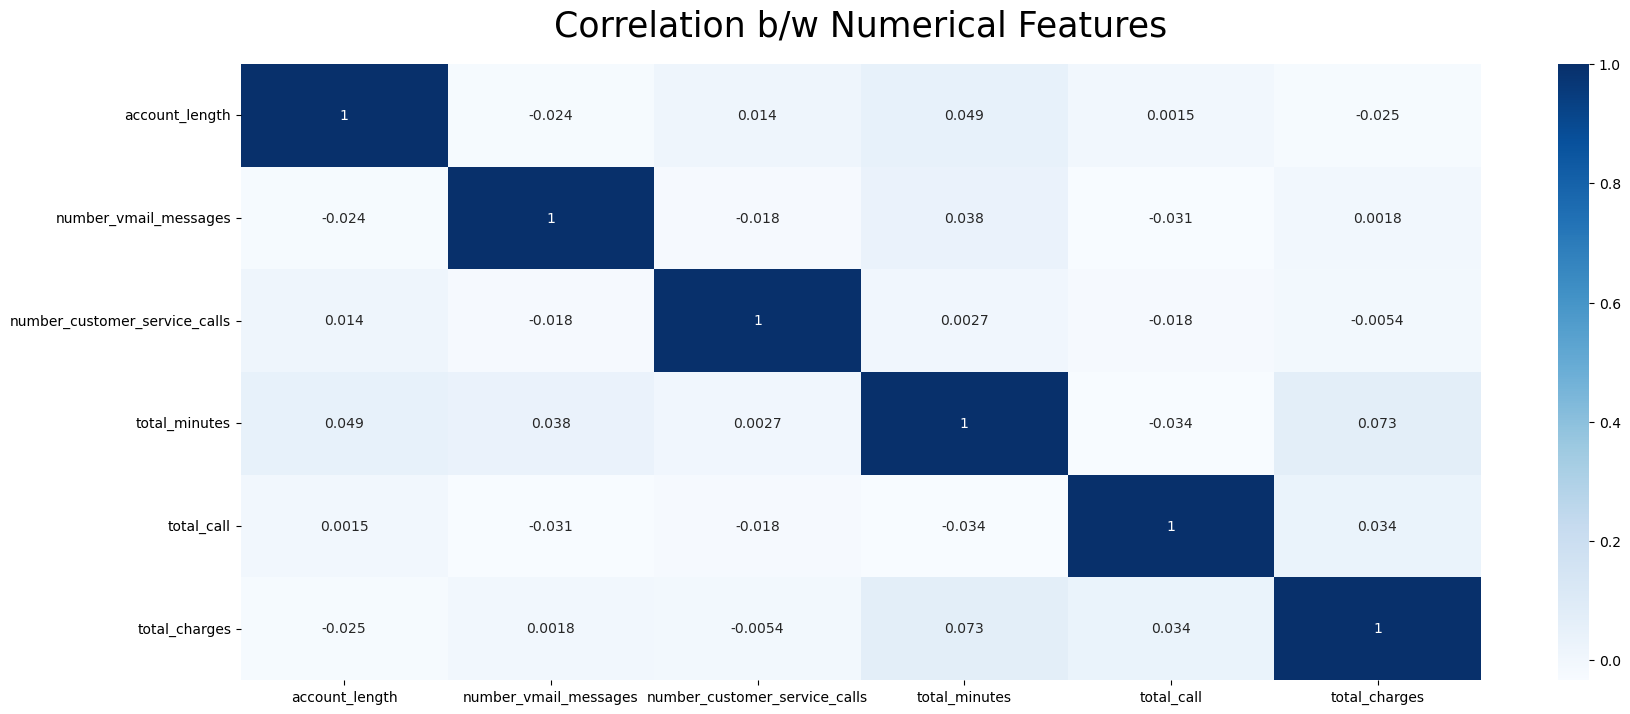

In [1009]:
table = train_df[num_cols].corr()
plt.figure(figsize=[20,8])
plt.title("Correlation b/w Numerical Features", size=25, pad=20)
sns.heatmap(table, cmap='Blues', annot=True)
plt.show()

In [1010]:
print(train_df.columns)

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'number_customer_service_calls', 'churn',
       'area', 'total_minutes', 'total_call', 'total_charges'],
      dtype='object')


In [891]:
# it does not have a linea relation bewteen variable

## Modelling

In [892]:
# Data Scaling and Splitting

In [1011]:
num_cols = train_df.select_dtypes(include=[float, int]).columns
cat_cols = ['international_plan','voice_mail_plan']
scaler=StandardScaler()
scaled_cols = scaler.fit_transform(train_df[num_cols])
train_scaled=pd.DataFrame(scaled_cols, columns=num_cols)
train_scaled[cat_cols] = train_df[cat_cols]
train_scaled.head()

,account_length,number_vmail_messages,number_customer_service_calls,total_minutes,total_call,total_charges,international_plan,voice_mail_plan
0,0.250166,2.557188,1.099273,-0.463613,-0.010962,-0.846960,0,0
1,1.255263,-0.512313,-1.198281,-0.318431,0.393172,1.014898,0,0
2,-0.272485,1.972521,1.099273,-0.343645,0.364305,0.665019,0,0
3,1.194957,-0.950813,-1.198281,-0.420472,0.681839,0.213252,NaN,NaN
4,-0.513708,-0.512313,1.099273,2.407542,0.046771,-0.298110,0,0


In [1012]:
import pandas as pd

#  train_scaled is your DataFrame and cat_cols is a list of categorical column names
x = train_scaled.copy()
cat_cols = ['international_plan', 'voice_mail_plan']

# Convert only the non-NaN values to integers
x[cat_cols] = x[cat_cols].apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(-1).astype(int)

# Now you can use x for further processing
y = pd.Series(train_df['churn'])

In [1013]:
# spliting of dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1683, 8), (421, 8), (1683,), (421,))

In [1014]:
print(x_train.columns)

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'total_minutes', 'total_call',
       'total_charges', 'international_plan', 'voice_mail_plan'],
      dtype='object')


# Model Evaluation with Cross Validation

In [1015]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd



models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
]

metrics_cols = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']

model_name = []
test_acuracy = []
test_precision = []
test_recall = []
test_f1 = []
scoring = ['accuracy', 'precision', 'recall', 'f1']

for model in models:
    cv_results = cross_validate(model, x, y, cv=5,
                                scoring=scoring, return_train_score=True)
    model_name.append(model.__class__.__name__)
    test_acuracy.append(round(cv_results['test_accuracy'].mean(), 3) * 100)
    test_precision.append(round(cv_results['test_precision'].mean(), 3) * 100)
    test_recall.append(round(cv_results['test_recall'].mean(), 3) * 100)
    test_f1.append(round(cv_results['test_f1'].mean(), 3) * 100)

metrics_data = [model_name, test_acuracy, test_precision, test_recall, test_f1]
m = {n: m for n, m in zip(metrics_cols, metrics_data)}
model_metrics = pd.DataFrame(m)
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
metrics_styled = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')
metrics_styled

,model_name,test_accuracy,test_precision,test_recall,test_f1
2,RandomForestClassifier,94.500000,98.100000,63.800000,77.200000
1,DecisionTreeClassifier,88.500000,59.800000,66.000000,62.700000
0,LogisticRegression,86.100000,66.500000,10.000000,17.400000


In [1016]:
final_model=RandomForestClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)
final_model.score(x_test, y_test)

0.9548693586698337

# Visualisation of Feature Weights

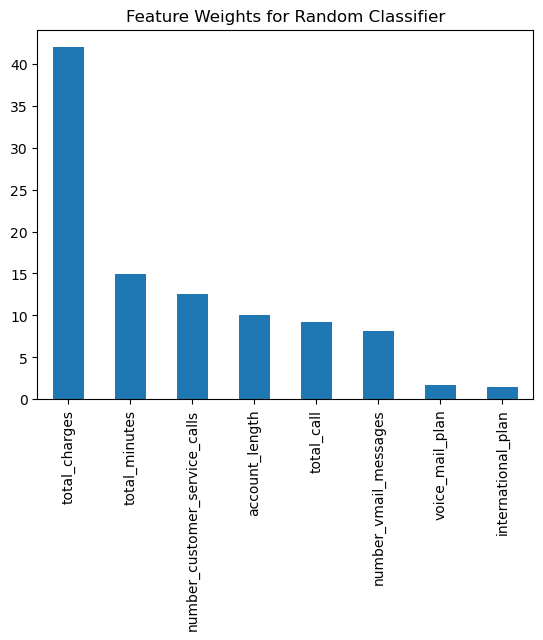

In [1017]:
feature_weights = pd.Series((np.round(final_model.feature_importances_,3))*100, 
                            index=x_train.columns.values).sort_values(ascending=False)

feature_weights.plot(kind='bar')
plt.title('Feature Weights for Random Classifier')
plt.show()

## scaling of test dataset

In [1018]:
print(test_df.columns)

Index(['state', 'account_length', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'number_customer_service_calls', 'churn',
       'area', 'total_minutes', 'total_call', 'total_charges'],
      dtype='object')


In [1019]:
num_cols = test_df.select_dtypes(include=[float, int]).columns
cat_cols = ['international_plan','voice_mail_plan']
scaler=StandardScaler()
scaled_cols = scaler.fit_transform(test_df[num_cols])
test_scaled=pd.DataFrame(scaled_cols, columns=num_cols)
test_scaled[cat_cols] = test_df[cat_cols]
test_scaled.head()

,account_length,number_vmail_messages,number_customer_service_calls,total_minutes,total_call,total_charges,international_plan,voice_mail_plan
0,-0.270460,-0.546572,0.408152,-0.386557,-1.612165,0.025592,NaN,NaN
1,-2.080225,-0.546572,1.215250,2.353303,0.515549,-0.258786,NaN,NaN
2,-0.319373,-0.619782,0.408152,-0.363849,0.485581,0.426043,NaN,NaN
3,0.389859,-0.692993,0.408152,-0.368411,0.006096,0.116516,NaN,NaN
4,-0.343829,-0.546572,2.829446,-0.416768,0.575484,-0.296509,NaN,NaN


In [1020]:
print(test_scaled.columns)

Index(['account_length', 'number_vmail_messages',
       'number_customer_service_calls', 'total_minutes', 'total_call',
       'total_charges', 'international_plan', 'voice_mail_plan'],
      dtype='object')


In [1021]:
# handling of missing  values in the test dataframe
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # You can choose different strategies
train_scaled_imputed = imputer.fit_transform(train_scaled)
test_scaled_imputed = imputer.transform(test_scaled)


# Submission

In [1022]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
predictions = final_model.predict(test_scaled_imputed)
submit = pd.DataFrame({'id': test_scaled.index, 'churn': predictions})
submit.churn.replace([0, 1], ['no', 'yes'], inplace=True)
submit.head()

,id,churn
0,0,no
1,1,no
2,2,no
3,3,no
4,4,no
